In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/heart_disease.csv',sep=',')
df.head(10)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
6,78.0,Female,121.0,175.0,High,Yes,Yes,Yes,18.042332,No,...,No,Medium,Medium,9.240911,Medium,107.0,85.0,11.582983,19.659461,No
7,38.0,Female,161.0,187.0,Low,Yes,Yes,Yes,34.736683,No,...,No,Low,Medium,7.841008,High,228.0,111.0,4.929381,17.146599,No
8,56.0,Female,135.0,291.0,Low,No,Yes,Yes,34.493112,Yes,...,Yes,High,Low,6.941403,High,317.0,103.0,5.119015,6.051129,No
9,75.0,Male,144.0,252.0,Low,Yes,Yes,No,30.142149,No,...,Yes,Low,Medium,4.002662,High,199.0,96.0,10.005698,7.604357,No


In [ ]:
df_1 = df

In [ ]:
# Describing all the Numerical Features
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [ ]:
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [ ]:
# Need to fill the missing values with the median

num_col = df.select_dtypes(include=[np.number]).columns
df[num_col] = df[num_col].fillna(df[num_col].median())

In [ ]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,120.0,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


Visualizations

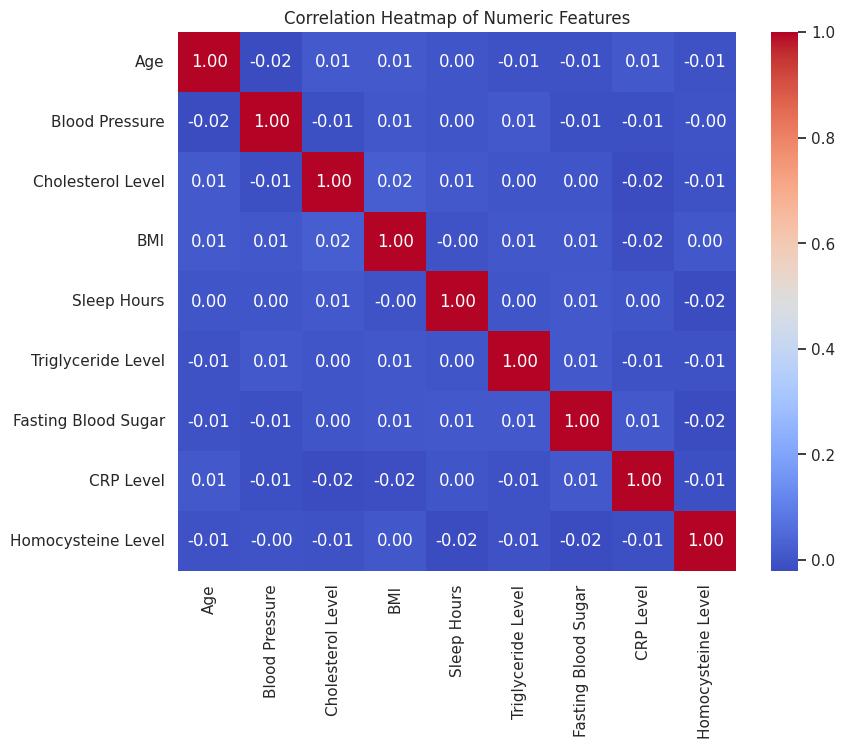

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Considering the dataset with columns only with numbers
num_df = df.select_dtypes(include=[np.number])

# Computing the correlation for heatmap
correlation_matrix = num_df.corr()

# Visualizse it
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


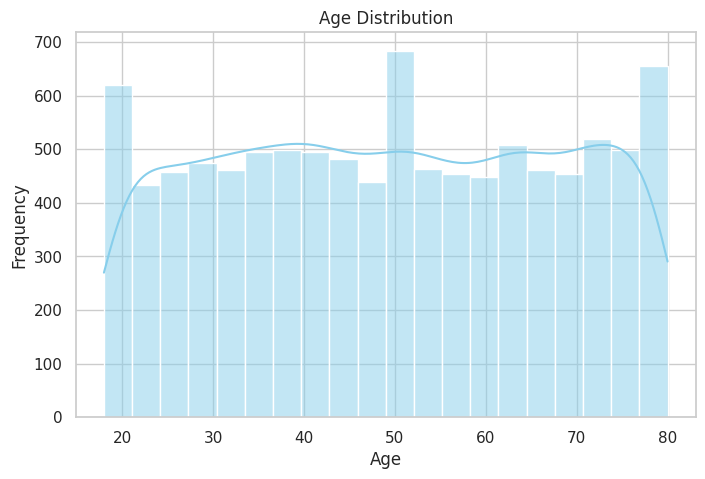

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a simple theme for the plots
sns.set_theme(style="whitegrid")

# Histogram for Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), kde=True, bins=20, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


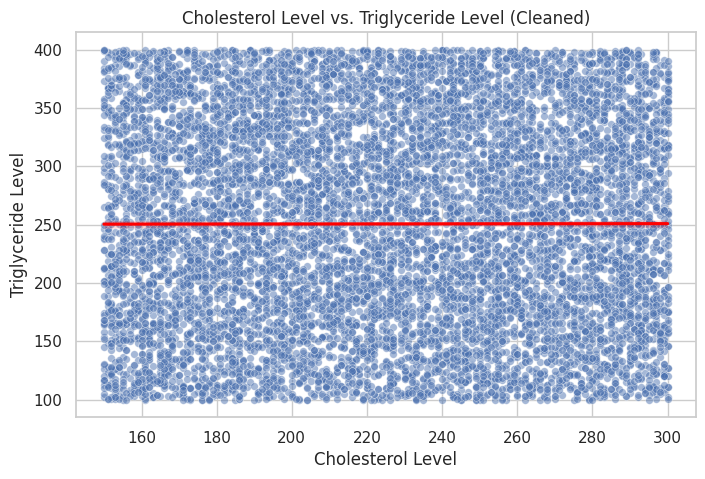

In [ ]:
# Scatter Plot for Cholesterol Level vs. Triglyceride Level
plt.figure(figsize=(8, 5))

# Filtering to remove extreme outliers
filtered_data = df[(df['Cholesterol Level'] < 400) & (df['Triglyceride Level'] < 500)]

# Creating scatter plot with transparency and smaller marker size
sns.scatterplot(x='Cholesterol Level', y='Triglyceride Level', data=filtered_data, alpha=0.5, s=30)

# Adding a trend line to visualize the linearity of the trend
sns.regplot(x='Cholesterol Level', y='Triglyceride Level', data=filtered_data, scatter=False, color="red")

plt.title("Cholesterol Level vs. Triglyceride Level (Cleaned)")
plt.xlabel("Cholesterol Level")
plt.ylabel("Triglyceride Level")
plt.show()


In [ ]:
df.head()


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,120.0,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


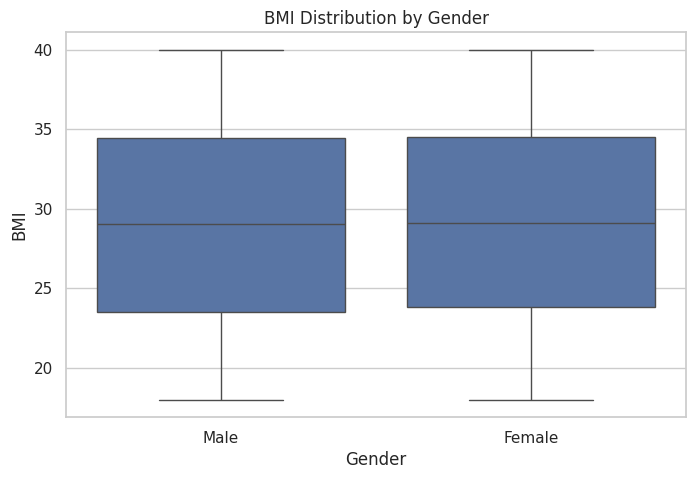

In [ ]:
# Box Plot for BMI grouped by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='BMI', data=df)
plt.title("BMI Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()


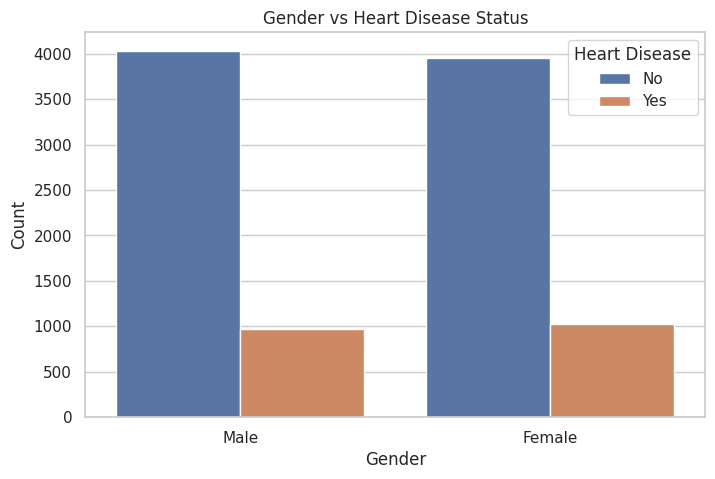

In [ ]:
# Relation between gender and heart disease
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Heart Disease Status')
plt.title("Gender vs Heart Disease Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


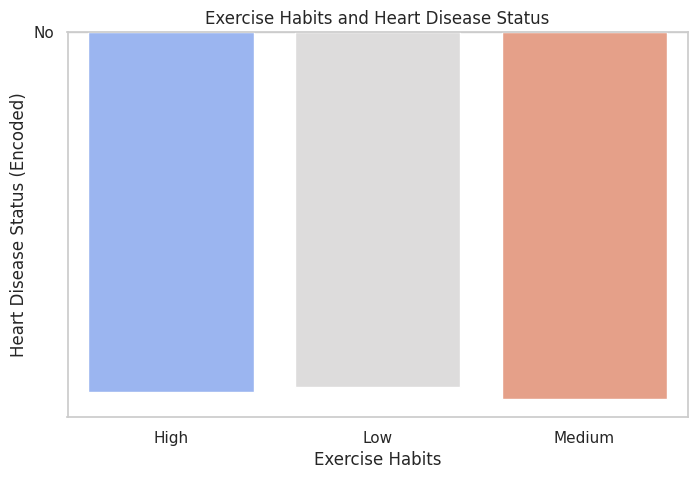

In [ ]:
# Barplot for Exercise Habits vs Heart Disease Status
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Exercise Habits', y='Heart Disease Status', ci=None, palette='coolwarm')
plt.title("Exercise Habits and Heart Disease Status")
plt.xlabel("Exercise Habits")
plt.ylabel("Heart Disease Status (Encoded)")
plt.show()

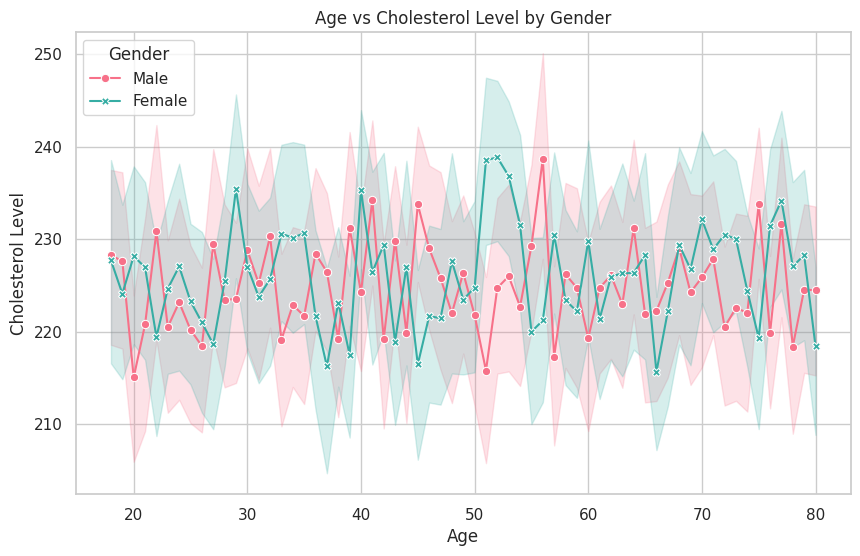

In [ ]:
# Lineplot for Age and Cholesterol Level
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age', y='Cholesterol Level', hue='Gender', style='Gender', markers=True, dashes=False, palette='husl')
plt.title("Age vs Cholesterol Level by Gender")
plt.xlabel("Age")
plt.ylabel("Cholesterol Level")
plt.show()

Preparing the dataset for the model creation

In [ ]:
# Creating dummy columns for categorical variables

df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Gender_Male,...,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_Low,Stress Level_Medium,Sugar Consumption_Low,Sugar Consumption_Medium,Heart Disease Status_Yes
0,56.0,153.0,155.0,24.991591,7.633228,342.0,120.0,12.969246,12.387250,True,...,True,True,False,False,False,False,True,False,True,False
1,69.0,146.0,286.0,25.221799,8.744034,133.0,157.0,9.355389,19.298875,False,...,False,True,False,False,True,False,False,False,True,False
2,46.0,126.0,216.0,29.855447,4.440440,393.0,92.0,12.709873,11.230926,True,...,False,True,True,True,False,True,False,True,False,False
3,32.0,122.0,293.0,24.130477,5.249405,293.0,94.0,12.509046,5.961958,False,...,True,False,True,True,False,False,False,False,False,False
4,60.0,166.0,242.0,20.486289,7.030971,263.0,154.0,10.381259,8.153887,True,...,True,False,False,True,False,False,False,False,False,False


In [ ]:
# Create a new feature: Age group
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 80, 90], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])

# Encode the new feature
df = pd.get_dummies(df, columns=['Age Group'], drop_first=True)

# Display the first few rows of the dataset with the new feature
df.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Gender_Male,...,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_Low,Stress Level_Medium,Sugar Consumption_Low,Sugar Consumption_Medium,Heart Disease Status_Yes,Age Group_Middle-aged,Age Group_Senior,Age Group_Elderly
0,56.0,153.0,155.0,24.991591,7.633228,342.0,120.0,12.969246,12.387250,True,...,False,False,False,True,False,True,False,False,True,False
1,69.0,146.0,286.0,25.221799,8.744034,133.0,157.0,9.355389,19.298875,False,...,False,True,False,False,False,True,False,False,True,False
2,46.0,126.0,216.0,29.855447,4.440440,393.0,92.0,12.709873,11.230926,True,...,True,False,True,False,True,False,False,False,True,False
3,32.0,122.0,293.0,24.130477,5.249405,293.0,94.0,12.509046,5.961958,False,...,True,False,False,False,False,False,False,True,False,False
4,60.0,166.0,242.0,20.486289,7.030971,263.0,154.0,10.381259,8.153887,True,...,True,False,False,False,False,False,False,False,True,False


In [ ]:
# Define features and target variable
X = df.drop('Heart Disease Status_Yes', axis=1)
y = df['Heart Disease Status_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pip install wolta

In [ ]:
from wolta.model_tools import compare_models

results= compare_models('clf',
                       ['ada', 'cat', 'lbm', 'raf', 'dtr', 'ext', 'rdg', 'per'],
                       ['acc', 'precision', 'f1', 'recall'],
                       X_train, y_train, X_test, y_test,
                       get_result=True)

AdaBoost
Accuracy Score: 0.8065
Precision Score: 0.65044225
F1 Score (weighted): 0.7201132023249378
Recall Score: 0.8065
***
CatBoost
Accuracy Score: 0.8055
Precision Score: 0.650286036036036
F1 Score (weighted): 0.7196186651896982
Recall Score: 0.8055
***
LightGBM
Accuracy Score: 0.805
Precision Score: 0.6502078117175764
F1 Score (weighted): 0.7193711911357341
Recall Score: 0.805
***
Random Forest
Accuracy Score: 0.8065
Precision Score: 0.65044225
F1 Score (weighted): 0.7201132023249378
Recall Score: 0.8065
***
Decision Tree
Accuracy Score: 0.6715
Precision Score: 0.6912423881228418
F1 Score (weighted): 0.6808474789024008
Recall Score: 0.6715
***
Extra Tree
Accuracy Score: 0.6755
Precision Score: 0.6933147338562137
F1 Score (weighted): 0.6839692412487571
Recall Score: 0.6755
***
Ridge
Accuracy Score: 0.8065
Precision Score: 0.65044225
F1 Score (weighted): 0.7201132023249378
Recall Score: 0.8065
***
Perceptron
Accuracy Score: 0.8065
Precision Score: 0.65044225
F1 Score (weighted): 0.72

In [ ]:
from wolta.model_tools import get_best_model

model = get_best_model(results, 'acc', 'clf', X_train, y_train, behavior='max-best')
y_pred = model.predict(X_test)

Best Algorithm is ada with the score of 0.8065


In [ ]:
from sklearn.metrics import classification_report as rep

print(rep(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.81      1.00      0.89      1613
        True       0.00      0.00      0.00       387

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000

